In [1]:
import collections
import itertools
import matplotlib.pyplot as plt
import nashpy as nash
import numpy as np

Some code to demo during a talk describing Game Theory as a research area.

In [2]:
def get_population(number_of_strategies, size=50):
    """
    Obtain a random population of strategies for a game.
    """
    population = np.random.randint(0, number_of_strategies, size)
    return population

def get_scores(population, opponents, game):
    """
    Score all the strategies
    """
    return [(game[0][i, j], game[1][i, j])  
            for i, j in zip(population, opponents)]

def mutate(scores, population, opponents):
    """
    Mutate the strategies, this is a naive approach: 
    if a strategy was beaten it mutates to its opponent.
    """
    mutated_population = []
    
    for score, strategy_pair in zip(scores, zip(population, opponents)):

        if score[1] >= score[0]:            
            mutated_population.append(strategy_pair[1])
        else:
            mutated_population.append(strategy_pair[0])
            
    return np.array(mutated_population)

def evolve(game, size, generations):
    """
    Evolve a population of strategies.
    """
    population = get_population(len(game[0]), size)
    opponents = get_population(len(game[0]), size)
    
    history = [population]

    for _ in range(generations):
        scores = get_scores(population, opponents, game)
        population = mutate(scores, population, opponents)
        opponents = get_population(len(game[0]), size)
        history.append(population)
    
    return history

def plot_history(history, game, ax, legend=True):
    """Plot the history of a genetic algorithm"""
    number_of_strategies = len(game[0])
    counts = [collections.Counter(population) for population in history]
    for strategy in range(number_of_strategies):
        ax.plot([generation[strategy] for generation in counts], label=strategy)
    if legend:
        ax.legend();

Let us look at the evolution of a population playing Rock Paper Scissors:

\\[
\begin{pmatrix}
    0  &  -1  &  1\\
    1  &  0   & -1\\
    -1 &  1   &  0\\
\end{pmatrix}
\\]

In [3]:
rps = np.array([[0, -1, 1],
                  [1, 0, -1],
                  [-1, 1, 0],
                 ])
rps = (rps, -rps)

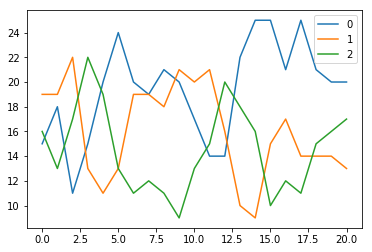

In [4]:
generations = 20
size = 50

fig, ax = plt.subplots(1)
history = evolve(game=rps, size=size, generations=generations)
plot_history(history, rps, ax);